In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import integrate as ig
from functions import J0, J0_rad, SQ, Voc_rad, LED_QE, calculate_summary, Vloss_CT, Vloss_SQ, calculate_Jsc, Voc_CT, Voc
from utils import bb, getAM15, linear, set_up_plot
from utils_EQE import wrapper_extend_EQE, Marcus_Gaussian

In [2]:
os.getcwd()

'/home/jungbluth/Desktop/git/Voltage-Loss-Calculations'

In [3]:
T = 293 # [K] ambient & cell temperature
h = 6.626 * 10**(-34) # [kgm^2/s]
h_eV = 4.1357*10**(-15) # eV s
c = 2.998 * 10**(8) # [m/s]
k = 1.3806 * 10**(-23) # [kgm^2/s^2K]
k_eV = 8.6173*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]
q_eV = 1
Vth = k_eV*T/q_eV # thermal voltage [eV]

### Import sEQE Data

#### (Replace and read in from file !!!)

In [4]:
ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_A_75_ZnPc_C60_4')
ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_D_95_ZnPc_C60_5')
ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_A_100_ZnPc_5')

In [5]:
F4ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_B_5_F4ZnPc_C60_2')
F4ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_A_50_F4ZnPc_C60_5')
#F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_C_75_F4ZnPc_C60_4')
F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_A_75_F4ZnPc_C60_5')
F4ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_B_95_F4ZnPc_C60_2')
F4ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_C_100_F4ZnPc_2')

In [6]:
# F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR55_D_5_F8ZnPc_C60_5')
F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_D_5_F8ZnPc_C60_1_(0.5TC)')
F8ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_D_25_F8ZnPc_C60_1')
F8ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_B_95_F8ZnPc_C60_5')
F8ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_C_100_F8ZnPc_8')

In [7]:
# F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR71_B_5_F16ZnPc_C60_2 (2)')
F16ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR57_C_75_F16ZnPc_C60_7')
F16ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_D_95_F16ZnPc_C60_1')
#F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_A_100_F16ZnPc_5')
F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_A_100_F16ZnPc_1_(0.5TC)')

In [8]:
parameters = pd.read_excel('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_Voltage/Voltage_analysis/5_FxZnPc_Summary.xlsx')
parameters.head()

,Material,Number,Voc (V),Err_Voc (V),Jsc (mA/cm2),Err_Jsc (mA/cm2),FF,Err_FF,ECT (eV),Err_ECT (eV),...,Err_Eopt (eV),l_opt (eV),Err_l_opt (eV),f_opt (eV2),Err_f_opt (eV),T1_exp (eV),T1_calc (eV),EQE File,Best_Voc,Best_Jsc
0,ZnPc,19,0.78,0.02,3.56,0.17,0.40,0.01,1.38,0.01,...,0.01,0.135589,NaN,0.032461,NaN,1.13,1.21,DR46_D_5_ZnPc_C60_2,0.76,3.74
1,F4ZnPc,13,0.89,0.02,3.10,0.17,0.33,0.01,1.45,0.01,...,0.01,0.179000,NaN,0.030680,NaN,1.13,1.20,DR40_B_5_F4ZnPc_C60_2,0.88,3.36
2,F8ZnPc,12,1.14,0.02,1.02,0.05,0.30,0.01,1.59,0.01,...,0.01,0.098000,NaN,0.001544,NaN,NaN,1.25,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.09
3,F16ZnPc,15,1.21,0.02,0.82,0.05,0.29,0.01,1.61,0.01,...,0.01,0.035000,NaN,0.000161,NaN,NaN,1.18,DR71_B_5_F16ZnPc_C60_2 (2),1.24,0.87
4,C60,11,1.13,0.07,1.08,0.08,0.30,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.50,NaN,DR39_D_C60_2,1.26,0.99


### Calculate Relevant Parameters

#### Pull out relevant parameters

In [9]:
columns = parameters['EQE File'][:-1]
samples = [ZnPc_5, F4ZnPc_5, F8ZnPc_5, F16ZnPc_5]

EIP = [1.75, 1.68, 1.78, 1.71] # from inflection point
Voc = parameters['Voc (V)'][:-1]
Jsc = parameters['Jsc (mA/cm2)'][:-1]
ECT = parameters['ECT (eV)'][:-1]
f = parameters['f_CT (eV2)'][:-1]
l = parameters['l_CT (eV)'][:-1]

In [10]:
summary = calculate_summary(columns, samples, Voc, Jsc, ECT, EIP, f, l)
summary
# summary.to_csv('/home/jungbluth/Desktop/Voc_Loss_comparison')

,Sample,Voc [V],ECT [V],Jsc [mA/cm2],"Voc,SQ [V]","Voc,rad [V]","Delta Voc,SC [V] (Rau)","Delta Voc,rad [V] (Rau)","Delta Voc,nonrad [V] (Rau)","Voc,rad [V] (CT properties)","Delta Voc,rad [V] (CT properties)","Delta Voc,nonrad [V] (CT properties)",LED QE,J0 [mA/cm2],"J0,rad [mA/cm2]",J0 (CT properties) [mA/cm2]
0,DR46_D_5_ZnPc_C60_2,0.78,1.38,3.56,1.473443,1.143944,0.044832,0.284667,0.363944,1.127264,0.252736,0.347264,5.491917e-07,1.363012e-13,7.485547e-20,2.642582e-13
1,DR40_B_5_F4ZnPc_C60_2,0.89,1.45,3.10,1.406645,1.239143,0.050652,0.116851,0.349143,1.233344,0.216656,0.343344,9.870037e-07,1.521519e-15,1.501744e-21,1.917339e-15
2,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.59,1.02,1.501703,1.386659,0.075308,0.039735,0.246659,1.396065,0.193935,0.256065,5.716851e-05,2.507328e-20,1.433402e-24,1.730546e-20
3,DR71_B_5_F16ZnPc_C60_2 (2),1.21,1.61,0.82,1.434923,1.335010,0.083265,0.016648,0.125010,1.436082,0.173918,0.226082,7.074156e-03,1.259910e-21,8.912799e-24,2.304384e-23


### J0 / Voc Test

#### Test the full derivation of J0 with only CT fit properties

In [11]:
# Limit of saturation current density based on CT properties
def J0_CT(EQE_EL, E_CT, l_CT, f_CT):
    """
    Function to calculate the limit of the saturation current density (J0) based on CT properties as defined by Koen Vandewal
    :param EQE_EL: LED quantum efficiency (unitless) [float]
    :param ECT: CT state energy(eV) [float]
    :param l: Reorganization energy (eV) [float]
    :param f: Oscillator strength (eV**2) [float]
    :return: J0: limit of the saturation current density [float]
    """
    a_CT = (q/(10*EQE_EL))*f_CT/(h_eV**3 * c**2)*np.sqrt(4*np.pi*l_CT*k_eV*T)*np.exp(-(E_CT + l_CT)**2 / (4*l_CT*k_eV*T))
    b_CT = (q/(10*EQE_EL))*f_CT/(h_eV**3 * c**2)*2*np.pi*(E_CT-l_CT)*np.exp(-(E_CT/(k_eV*T)))
    J0_CT = a_CT + b_CT
    
    return a_CT, b_CT, J0_CT

In [12]:
a_CT_list, b_CT_list, J0_CT_list = J0_CT(summary['LED QE'], parameters['ECT (eV)'][:-1], parameters['l_CT (eV)'][:-1], parameters['f_CT (eV2)'][:-1])

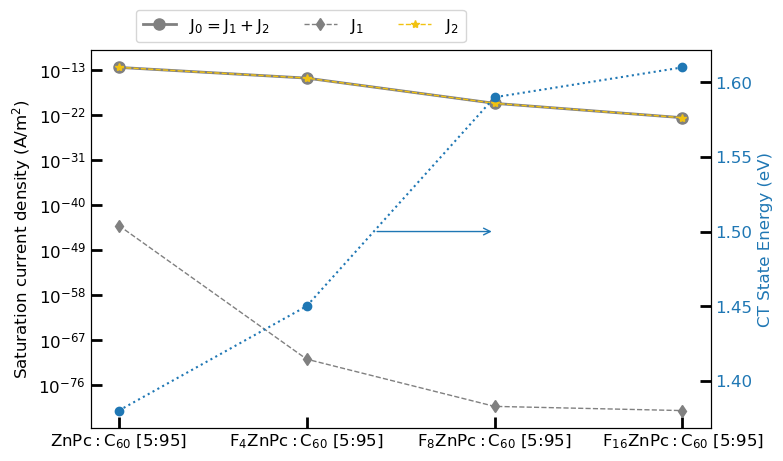

In [46]:
fontsize = 12
markersize = 6

values = [0.25, 0.50, 0.75, 1]
labels = ['$\mathregular{ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{4}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{8}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{16}ZnPc:C_{60}}$ [5:95]']
x_label = ''
y_label = 'Saturation current density $\mathrm{(A/m^2)}$'

fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)

plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor'] = 'xkcd:white'
plt.rcParams['figure.edgecolor'] = 'xkcd:white'
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2)
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2)

plt.xlabel(x_label, fontsize=fontsize, fontweight='medium')
plt.ylabel(y_label, fontsize=fontsize, fontweight='medium')

plt.xticks(values, labels)

plt.semilogy(values, J0_CT_list, label='$\mathrm{J_0 = J_1 + J_2}$', marker='o', markersize=markersize+2, ls='-', linewidth=2, color='grey')
plt.semilogy(values, a_CT_list, label='$\mathrm{J_1}$', marker='d', markersize=markersize, ls='--', linewidth=1, color='grey')
plt.semilogy(values, b_CT_list, label='$\mathrm{J_2}$', marker='*', markersize=markersize, ls='--', linewidth=1, color='#f1c211')

plt.legend(fontsize=fontsize, ncol=3, bbox_to_anchor=[0.06, 1])

ax2 = ax1.twinx()

ax2.plot(values, parameters['ECT (eV)'][:-1], marker='o', markersize=markersize, color='tab:blue', linestyle='dotted')
ax2.set_ylabel('CT State Energy (eV)', fontsize=fontsize, fontweight='medium', color='tab:blue')

ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2, labelcolor='tab:blue')
ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2, labelcolor='tab:blue')

ax2.annotate('', xy=(0.75, 1.5), xytext=(0.59, 1.5), arrowprops=dict(arrowstyle="->", color='tab:blue'), fontsize=12, color='grey')

plt.savefig('/home/jungbluth/Desktop/J0_contributions.png')

In [14]:
a_opt_list, b_opt_list, J0_opt_list = J0_CT(summary['LED QE'], parameters['Eopt (eV)'][:-1], parameters['l_opt (eV)'][:-1], parameters['f_opt (eV2)'][:-1])

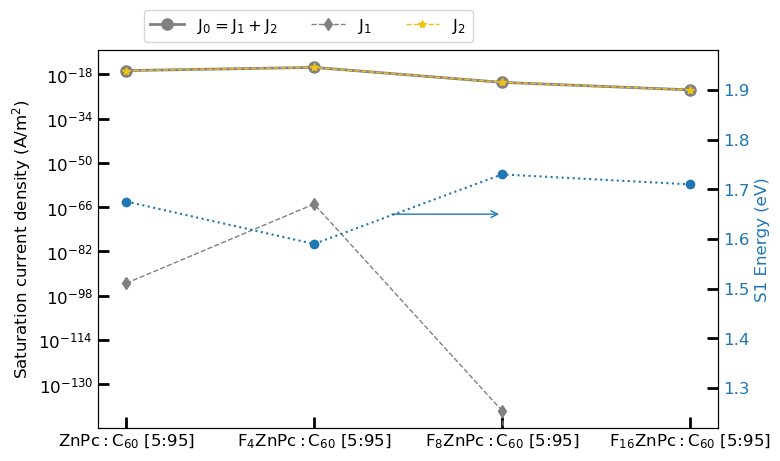

In [45]:
fontsize = 12
markersize = 6

values = [0.25, 0.50, 0.75, 1]
labels = ['$\mathregular{ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{4}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{8}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{16}ZnPc:C_{60}}$ [5:95]']
x_label = ''
y_label = 'Saturation current density $\mathrm{(A/m^2)}$'

fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)

plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor'] = 'xkcd:white'
plt.rcParams['figure.edgecolor'] = 'xkcd:white'
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2)
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2)

plt.xlabel(x_label, fontsize=fontsize, fontweight='medium')
plt.ylabel(y_label, fontsize=fontsize, fontweight='medium')

plt.xticks(values, labels)

plt.semilogy(values, J0_opt_list, label='$\mathrm{J_0 = J_1 + J_2}$', marker='o', markersize=markersize+2, ls='-', linewidth=2, color='grey')
plt.semilogy(values, a_opt_list, label='$\mathrm{J_1}$', marker='d', markersize=markersize, ls='--', linewidth=1, color='grey')
plt.semilogy(values, b_opt_list, label='$\mathrm{J_2}$', marker='*', markersize=markersize, ls='--', linewidth=1, color='#f1c211')

plt.legend(fontsize=fontsize, ncol=3, bbox_to_anchor=[0.06, 1])

ax2 = ax1.twinx()

ax2.plot(values, parameters['Eopt (eV)'][:-1], marker='o', markersize=markersize, color='tab:blue', linestyle='dotted')
ax2.set_ylabel('S1 Energy (eV)', fontsize=fontsize, fontweight='medium', color='tab:blue')

ax2.set_ylim(1.22,1.98)

ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2, labelcolor='tab:blue')
ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2, labelcolor='tab:blue')

ax2.annotate('', xy=(0.75, 1.65), xytext=(0.6, 1.65), arrowprops=dict(arrowstyle="->", color='tab:blue'), fontsize=12, color='grey')

# plt.savefig('/home/jungbluth/Desktop/J0_contributions.png')

#### Test the full / approximated derivation of J0 with CT and Opt Fit properties

In [42]:
# Limit of saturation current density based on CT properties
def J0_CT_opt(EQE_EL, E_CT, l_CT, f_CT, E_opt, l_opt, f_opt):
    """
    Function to calculate the limit of the saturation current density (J0) based on CT properties as defined by Koen Vandewal
    :param EQE_EL: LED quantum efficiency (unitless) [float]
    :param ECT: CT state energy(eV) [float]
    :param l: Reorganization energy (eV) [float]
    :param f: Oscillator strength (eV**2) [float]
    :return: J0: limit of the saturation current density [float]
    """
#     a_CT = np.sqrt(4*np.pi*l_CT*k_eV*T)*np.exp(-(E_CT + l_CT)**2 / (4*l_CT*k_eV*T))
    a_CT = 0
    b_CT = 2*np.pi*(E_CT-l_CT)*np.exp(-(E_CT/(k_eV*T)))
    J0_CT = (q/(10*EQE_EL))*f_CT/(h_eV**3 * c**2)*(a_CT + b_CT)
    
#     a_opt = np.sqrt(4*np.pi*l_opt*k_eV*T)*np.exp(-(E_opt + l_opt)**2 / (4*l_opt*k_eV*T))
    a_opt = 0
    b_opt = 2*np.pi*(E_opt-l_opt)*np.exp(-(E_opt/(k_eV*T)))
    J0_opt = (q/(10*EQE_EL))*f_opt/(h_eV**3 * c**2)*(a_opt+b_opt)
    
    J0_sum = J0_CT + J0_opt
    
    return J0_CT, J0_opt, J0_sum

In [43]:
J0_CT_list, J0_opt_list, J0_sum_list = J0_CT_opt(summary['LED QE'], parameters['ECT (eV)'][:-1], parameters['l_CT (eV)'][:-1], parameters['f_CT (eV2)'][:-1], parameters['Eopt (eV)'][:-1], parameters['l_opt (eV)'][:-1], parameters['f_opt (eV2)'][:-1])

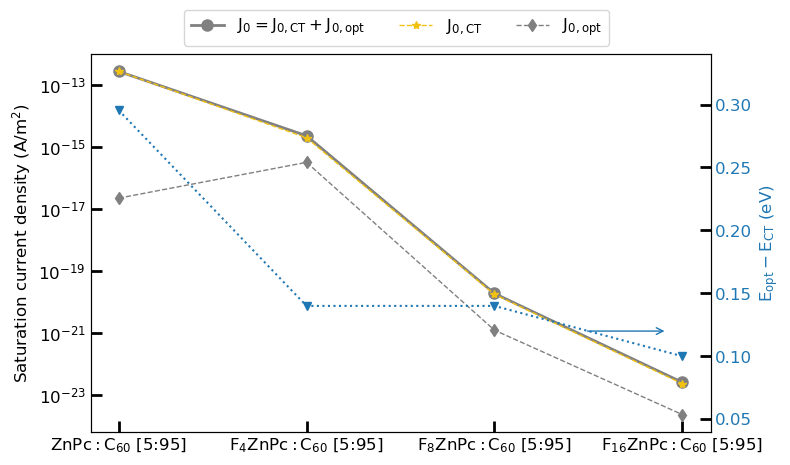

In [110]:
fontsize = 12
markersize = 6

values = [0.25, 0.50, 0.75, 1]
labels = ['$\mathregular{ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{4}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{8}ZnPc:C_{60}}$ [5:95]', '$\mathregular{F_{16}ZnPc:C_{60}}$ [5:95]']
x_label = ''
y_label = 'Saturation current density $\mathrm{(A/m^2)}$'

fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)

plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor'] = 'xkcd:white'
plt.rcParams['figure.edgecolor'] = 'xkcd:white'
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2)
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2)

plt.xlabel(x_label, fontsize=fontsize, fontweight='medium')
plt.ylabel(y_label, fontsize=fontsize, fontweight='medium')

plt.xticks(values, labels)

plt.semilogy(values, J0_sum_list, label='$\mathrm{J_0 = J_{0,CT} + J_{0,opt}}$', marker='o', markersize=markersize+2, ls='-', linewidth=2, color='grey')
plt.semilogy(values, J0_CT_list, label='$\mathrm{J_{0,CT}}$', marker='*', markersize=markersize, ls='--', linewidth=1, color='#f1c211')
plt.semilogy(values, J0_opt_list, label='$\mathrm{J_{0,opt}}$', marker='d', markersize=markersize, ls='--', linewidth=1, color='grey')

plt.legend(fontsize=fontsize, ncol=3, bbox_to_anchor=[0.85, 1.14])

ax2 = ax1.twinx()

# ax2.plot(values, parameters['ECT (eV)'][:-1], marker='^', markersize=markersize, color='tab:blue', linestyle='dotted', label='$\mathrm{E_{CT}}$')
# ax2.plot(values, parameters['Eopt (eV)'][:-1], marker='v', markersize=markersize, color='tab:blue', linestyle='dotted', label='$\mathrm{E_{opt}}$')
ax2.plot(values, parameters['Eopt (eV)'][:-1]-parameters['ECT (eV)'][:-1], marker='v', markersize=markersize, color='tab:blue', linestyle='dotted', label='$\mathrm{E_{opt}} - \mathrm{E_{CT}}$')
ax2.set_ylabel('$\mathrm{E_{opt}} - \mathrm{E_{CT}}$ (eV)', fontsize=fontsize, fontweight='medium', color='tab:blue')

ax2.set_ylim(0.04,0.34)

ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2, labelcolor='tab:blue')
ax2.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2, labelcolor='tab:blue')

ax2.annotate('', xy=(0.98, 0.12), xytext=(0.87, 0.12), arrowprops=dict(arrowstyle="->", color='tab:blue'), fontsize=12, color='grey')
# plt.legend(fontsize=fontsize, ncol=2, bbox_to_anchor=[1.02, 1.14])

plt.savefig('/home/jungbluth/Desktop/J0_CT_opt_contributions.png')

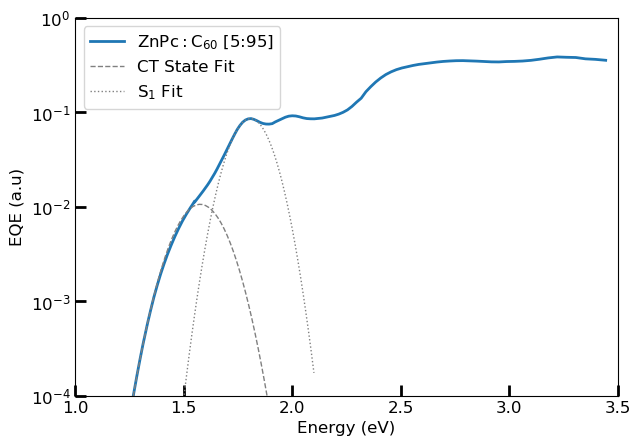

In [41]:
n = 0

# Something is wrong with this code
# EQE_Fit_df = Marcus_Gaussian(np.arange(0.8, 2.5, 0.05), 
#                               E_CT = parameters['ECT (eV)'][n], 
#                               l_CT = parameters['l_CT (eV)'][n],  
#                               f_CT = parameters['f_CT (eV2)'][n], 
#                               E_opt = parameters['Eopt (eV)'][n], 
#                               l_opt = parameters['l_CT (eV)'][n], 
#                               f_opt = parameters['f_opt (eV2)'][n], 
#                               T=295)


EQE_Opt_df = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Fits/ZnPc/5_ZnPc/5_ZnPc_Fit_Marcus_Opt')
EQE_CT_df = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Fits/ZnPc/5_ZnPc/5_ZnPc_Fit_Marcus_CT_subOpt')

fontsize = 12
markersize = 6

x_label = 'Energy (eV)'
y_label = 'EQE (a.u)'

fig, ax1 = plt.subplots(figsize=(7,5), dpi=100)

plt.grid(False)
plt.tick_params(labelsize=12)
plt.minorticks_on()
plt.rcParams['figure.facecolor'] = 'xkcd:white'
plt.rcParams['figure.edgecolor'] = 'xkcd:white'
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='major', length=8, width=2)
ax1.tick_params(labelsize=fontsize, direction='in', axis='both', which='minor', length=0, width=2)

plt.xlabel(x_label, fontsize=fontsize, fontweight='medium')
plt.ylabel(y_label, fontsize=fontsize, fontweight='medium')

plt.semilogy(ZnPc_5_extended['Energy'], ZnPc_5_extended['EQE'], label='$\mathrm{ZnPc:C_{60}}$ [5:95]', markersize=0, ls='-', linewidth=2, color='tab:blue')
plt.semilogy(EQE_CT_df['Energy'], EQE_CT_df['Signal'], label='CT State Fit', markersize=0, ls='--', linewidth=1, color='grey')
plt.semilogy(EQE_Opt_df['Energy'], EQE_Opt_df['Signal'], label='$\mathrm{S_1}$ Fit', markersize=0, ls='dotted', linewidth=1, color='grey')

plt.legend(fontsize=fontsize)
plt.ylim(10E-5, 1)
plt.xlim(1, 3.5)
plt.savefig('/home/jungbluth/Desktop/EQE_Marcus_Fit.png')

## Adding optical terms to the equation

### Modelled EQE

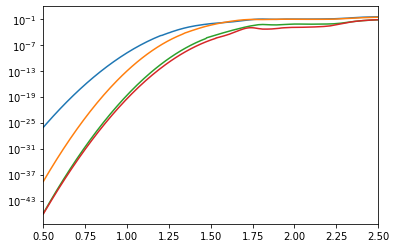

In [17]:
ZnPc_5_extended = wrapper_extend_EQE(parameters, samples, 0)
F4ZnPc_5_extended = wrapper_extend_EQE(parameters, samples, 1)
F8ZnPc_5_extended = wrapper_extend_EQE(parameters, samples, 2, num=-10)
F16ZnPc_5_extended = wrapper_extend_EQE(parameters, samples, 3, num=-28)

In [32]:
parameters['l_opt (eV)'][n]

0.135589

## __Testing the Jsc calculations...__

In [18]:
print('Original EQE: ', calculate_Jsc(F4ZnPc_5['Energy'], F4ZnPc_5['EQE']))
print('Extended EQE: ', calculate_Jsc(F4ZnPc_5_extended['Energy'], F4ZnPc_5_extended['EQE']))

Original EQE:  3.2338247230431394
Extended EQE:  3.2350843421530944


/home/jungbluth/Desktop/git/Voltage-Loss-Calculations/functions.py:61: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = ig.quad(lambda e: q*EQE_intp(e)*AM15_intp(e), min(E), max(E))


### __Comments__:

> ### The difference does not seem to be super big!

## __Testing the Voc,rad calculations...__

In [19]:
def Voc_rad_from_CT(Jsc, n, df=parameters):
    """
    Function to calculate the Voc,rad from CT properties
    :param Jsc: short-circuit current [float]
    :param n: number of sample [int]
    :param df: dataFrame with CT / Opt fit information [dataFrame]
    :return 
    """
    
    ##### This was wrong: ########################### 
#     a_CT = k_eV*T/q_eV * np.log((2*np.pi*q)/(10*Jsc*h_eV**3 * c**2) * df['f_CT (eV2)'][n]*(df['ECT (eV)'][n]-df['l_CT (eV)'][n]))
#     b_opt = k_eV*T/q_eV * np.log((2*np.pi*q)/(10*Jsc*h_eV**3 * c**2) * df['f_opt (eV2)'][n]*(df['Eopt (eV)'][n]-df['l_opt (eV)'][n])*np.exp(-(df['Eopt (eV)'][n]-df['ECT (eV)'][n])/(k_eV*T)))
    ################################################################################################################

    a_CT = k_eV*T/q_eV * np.log((2*np.pi*q)/(10*Jsc*h_eV**3 * c**2) * df['f_CT (eV2)'][n]*(df['ECT (eV)'][n]-df['l_CT (eV)'][n]))
    b_opt = k_eV*T/q_eV * np.log((2*np.pi*q)/(10*Jsc*h_eV**3 * c**2) * df['f_CT (eV2)'][n]*(df['ECT (eV)'][n]-df['l_CT (eV)'][n]) +  df['f_opt (eV2)'][n]*(df['Eopt (eV)'][n]-df['l_opt (eV)'][n])*np.exp(-(df['Eopt (eV)'][n]-df['ECT (eV)'][n])/(k_eV*T)))
        
    Voc_rad = df['ECT (eV)'][n] - a_CT
    return a_CT, b_opt, Voc_rad

In [20]:
# Radiative limit of the open-circuit voltage
def Voc_rad_from_EQE(EQE_df, n, df=parameters):
    """
    Function to calculate the radiative limit of the open-circuit voltage
    :param EQE_df: dataFrame of EQE values [dataFrame]
    :param n: number of sample [int]
    :param df: dataFrame with CT / Opt fit information [dataFrame]
    :return: Voc_rad: Radiative upper limit of the open-circuit voltage [float]
    """
    
    bb_df = bb(EQE_df['Energy'])
    j0_rad = J0_rad(EQE_df, bb_df)
    
    jsc = calculate_Jsc(EQE_df['Energy'], EQE_df['EQE'])
    
    Voc_rad = k*T/q * math.log((jsc/j0_rad)+1)
    
    print('Calculated Jsc: ', jsc)
    print('J0,rad: ', j0_rad)
    print('Ratio: ', (jsc/j0_rad))
    print('Voc,rad: ', Voc_rad)
    
    # Experiment: Opt extension to Vandewal equation
    a_CT, b_CT, Voc_rad_CT = Voc_rad_from_CT(jsc, n, df=df)
    print('A_CT: ', a_CT)
    print('B_Opt: ', b_CT)
    print('Voc,rad (CT): ', Voc_rad_CT)
    
#     # Experiment: Test with original Jsc
#     Voc_rad_2 = k*T/q * math.log((df['Jsc (mA/cm2)'][n]/j0_rad)+1)
#     print('                    ')
#     print('Original Jsc: ', df['Jsc (mA/cm2)'][n])
#     print('Ratio: ', (df['Jsc (mA/cm2)'][n]/j0_rad))
#     print('Voc,rad: ', Voc_rad_2)
#     a_CT, b_CT, Voc_rad_CT = Voc_rad_from_CT(df['Jsc (mA/cm2)'][n], n, df=df)
#     print('A_CT: ', a_CT)
#     print('B_Opt: ', b_CT)
#     print('Voc,rad (CT): ', Voc_rad_CT)
    
#     Delta_Voc_nonrad = Voc_rad - Voc
    return Voc_rad

In [21]:
# print('---------------------------')
# print('Standard EQE Spectrum')
# print('---------------------------')
# Voc_rad_from_EQE(ZnPc_5, n=0);

print('---------------------------')
print('Extended EQE Spectrum')
print('---------------------------')
Voc_rad_from_EQE(ZnPc_5_extended, n=0);

---------------------------
Extended EQE Spectrum
---------------------------
Calculated Jsc:  3.816226098852374
J0,rad:  1.642677133748058e-19
Ratio:  2.323174786115748e+19
Voc,rad:  1.1258552362184222
A_CT:  0.25098138587451435
B_Opt:  0.25098138587493607
Voc,rad (CT):  1.1290186141254854


### __Comments__:

> #### The Jsc calculation is not the limiting factos
> #### The calculation is limited by J0,rad, which strongly dependes on how far the EQE extends
> #### For the calculations of Voc,rad from CT properties, the full Jsc needs to be passed in, rather than the Jsc contribution of the CT / Opt Fit. This is because we assume Jph~Jsc.

In [192]:
def comparison(df, samples=[ZnPc_5, F4ZnPc_5, F8ZnPc_5, F16ZnPc_5]):
    
    summary = pd.DataFrame()
    
    J0_rad_list = []
    Voc_rad_list = []
    Sub_CT_list = []
    Sub_opt_list = []
    Voc_rad_CT_list = []
    Voc_rad_opt_list = []
    
    for n in range(len(df)):
        energy = np.arange(0.4, 2.5, 0.01)
        EQE_df = Marcus_Gaussian(energy, df['ECT (eV)'][n], df['l_CT (eV)'][n], df['f_CT (eV2)'][n], df['Eopt (eV)'][n], df['l_opt (eV)'][n], df['f_opt (eV2)'][n], 300)
        
        orig_EQE_df = samples[n]
        
        EQE_extended = extend_EQE(energy, orig_EQE_df, EQE_df)

        E = EQE_extended['Energy']
        bb_df = bb(E)

        # Calculate Parameters        
        j0_rad = J0_rad_test(EQE_extended['Energy'], EQE_extended['EQE'], bb_df)
        
        Jsc = df['Jsc (mA/cm2)'][n]
        print(Jsc)
        Jsc = calculate_Jsc(EQE_extended['Energy'], EQE_extended['EQE'])
        print(Jsc)
        
        voc_rad = Voc_rad(df['Voc (V)'][n], Jsc, j0_rad)[0]
        
        sub_CT, sub_opt = Voc_CT_opt_test(df['Jsc (mA/cm2)'][n], df['ECT (eV)'][n], df['l_CT (eV)'][n], df['f_CT (eV2)'][n], df['Eopt (eV)'][n], df['l_opt (eV)'][n], df['f_opt (eV2)'][n])
        voc_rad_CT = df['ECT (eV)'][n] - sub_CT
        voc_rad_opt = df['ECT (eV)'][n] - sub_CT - sub_opt
        
        J0_rad_list.append(j0_rad)
        Voc_rad_list.append(voc_rad)
        Sub_CT_list.append(sub_CT)
        Sub_opt_list.append(sub_opt)
        Voc_rad_CT_list.append(voc_rad_CT)
        Voc_rad_opt_list.append(voc_rad_opt)
        
    summary['J0,rad'] = J0_rad_list
    summary['Voc,rad'] = Voc_rad_list
    summary['Voc,rad_CT'] = Voc_rad_CT_list
    summary['Voc,rad_opt'] = Voc_rad_opt_list
    summary['sub,CT'] = Sub_CT_list
    summary['sub,opt'] = Sub_opt_list
    
    return summary

In [29]:
def revert_Voc_rad(V_rad, ECT, Jsc,l):
    f = (Jsc/10)*(h_eV**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q_eV*V_rad)/(k_eV*T)))
#     f = (Jsc/10)*(h**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q*V_rad)/(k*T)))
    return f

In [30]:
revert_Voc_rad(V_rad = summary['Voc,rad [V]'][0], ECT=summary['ECT [V]'][0], Jsc=summary['Jsc [mA/cm2]'][0], l = parameters['l (eV)'][0])

1.619567827175709e-13